<a href="https://www.kaggle.com/code/javierpachas/nlp-pytorch-03-nn?scriptVersionId=145397717" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# The Perceptron: The Simplest Neural Network

Implementing a perceptron using PyTorch

In [1]:
import torch
import torch.nn as nn

class Perceptron(nn.Module):
    """ A perceptron is one linear layer"""
    def __init__(self, input_dim):
        """
        Args:
            input_dim (int): size of the input features
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)
    
    def forward(self, x_in):
        """ The forward pass of the perceptron
        Args:
            x_in (torch.Tensor): an input data tensor
                x_in.shape should be (batch, num_features)
        Returns:
            the resulting tensor tensor.shape should be (batch,)
        """
        return torch.sigmoid(self.fc1(x_in)).squeeze()

## Activation Functions

### Sigmoid
$f(x) = 1/(1+exp(-x))$

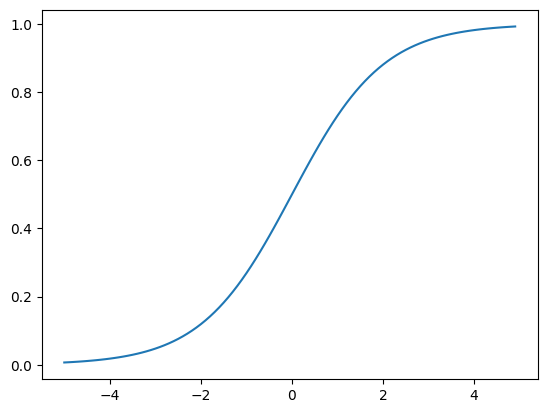

In [3]:
import torch
import matplotlib.pyplot as plt

x = torch.arange(-5, 5, 0.1)
y = torch.sigmoid(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

### Tanh
$f(x)=tanh(x)=(e^x -e^{-x})/(e^{x}+e^{-x})$

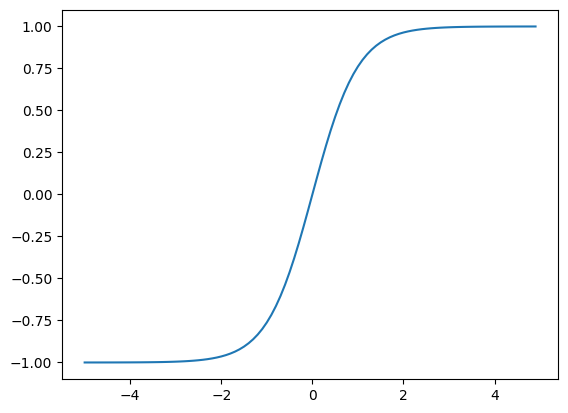

In [4]:
import torch
import matplotlib.pyplot as plt

x = torch.arange(-5,5,0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

### ReLU: Rectified Linear Unit
$f(x)= max(0,x)$

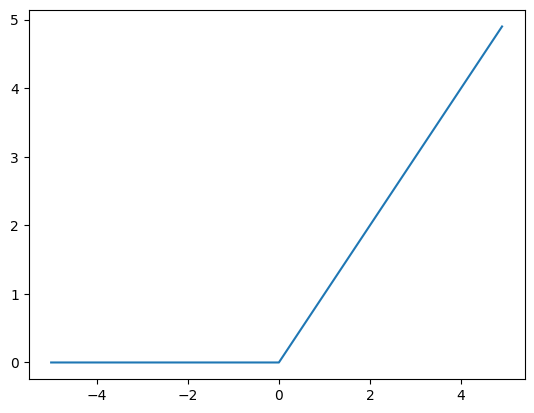

In [5]:
import torch
import matplotlib.pyplot

relu = torch.nn.ReLU()
x = torch.arange(-5,5,0.1)
y = relu(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

**PReLU Activation:** A leak coefficient $a$ is a learned parameter
$$f(x)=max(0,ax)$$

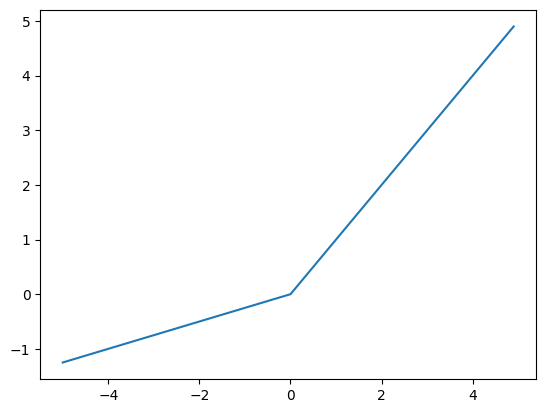

In [17]:
import torch
import matplotlib.pyplot as plt

prelu = torch.nn.PReLU(num_parameters = 1)
x = torch.arange(-5., 5.,0.1)
y = prelu(torch.Tensor(x))

plt.plot(x, y.detach().numpy())
plt.show()

### Softmax
$$softmax(x_i)= \frac{e^{x_i}}{\sum_{j=1}^{k}e^{x_j}}$$

In [20]:
import torch
import torch.nn as nn

softmax = nn.Softmax(dim= 1)
x_input = torch.randn(1,3)
y_output = softmax(x_input)

print("x_input: {}".format(x_input))
print("y_output: {}".format(y_output))

print(torch.sum(y_output, dim = 1))

x_input: tensor([[-1.5079,  0.2513, -0.2483]])
y_output: tensor([[0.0968, 0.5621, 0.3411]])
tensor([1.])


## Loss Functions

### Mean Squared Error Loss

$$L_{MLE}=\frac{1}{n}\sum_{i=1}^{n}(y-\hat{y})^2$$

In [1]:
import torch
import torch.nn as nn

mse_loss = nn.MSELoss()
outputs = torch.randn(3,5, requires_grad = True)
targets = torch.randn(3,5)

loss = mse_loss(outputs, targets)
print(loss)

tensor(2.2329, grad_fn=<MseLossBackward0>)


### Categorical Cross-Entropy Loss

$$L_{cross entropy} (y,\hat{y})=-\sum_{i} y_i log(\hat{y}_i)$$

In [1]:
import torch
import torch.nn as nn

ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3,5, requires_grad = True)
targets = torch.tensor([1,0,3], dtype = torch.int64)
loss = ce_loss(outputs, targets)

print(loss)

tensor(2.4207, grad_fn=<NllLossBackward0>)


### Binary Cross-Entropy Loss

In [4]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4,1, requires_grad = True))
targets = torch.tensor([1,0,1,0], dtype = torch.float32).view(4,1)
loss = bce_loss(probabilities, targets)
print(probabilities)
print(loss)

tensor([[0.4247],
        [0.5533],
        [0.4523],
        [0.4605]], grad_fn=<SigmoidBackward0>)
tensor(0.7682, grad_fn=<BinaryCrossEntropyBackward0>)
